In [1]:
import pickle

# import mst file

with open("mst.pkl", "rb") as f:
    mst = pickle.load(f)

In [7]:
mst

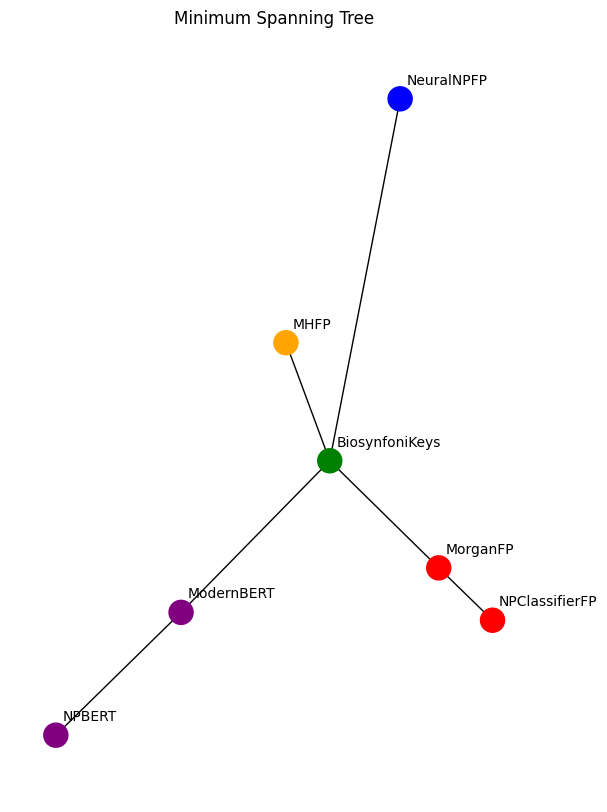

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Example color list (must match number of nodes)
node_colors = ['red', 'green', 'blue', 'orange', 'red', 'purple', "purple"]
node_colors = node_colors[:len(mst.nodes)]  # Trim to match node count
pos_without = nx.spring_layout(mst, weight='weight', k=1.0, iterations=300)

# Get labels
node_labels_without = nx.get_node_attributes(mst, 'label')

# Plot
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

# Draw nodes and edges only (no labels yet)
nx.draw(mst, pos_without, with_labels=False, node_color=node_colors, edge_color='black')

# Draw labels separately, slightly offset from the nodes
label_offset = 0.025  # Adjust this value if needed
for node, (x, y) in pos_without.items():
    label = node_labels_without.get(node, str(node))
    plt.text(x + label_offset, y + label_offset, label,
             horizontalalignment='left', verticalalignment='bottom',
             fontsize=10, bbox=dict(facecolor='none', edgecolor='none', alpha=0.6))

plt.title("Minimum Spanning Tree")
plt.show()


In [8]:
import pickle 
import numpy as np

with open("similarities.pkl", "rb") as f:
    similarities = pickle.load(f)

# Convert similarities to a numpy array
similarity_matrix = np.nan_to_num(similarities, nan=0.0)
cor_matrix = np.corrcoef(similarity_matrix)

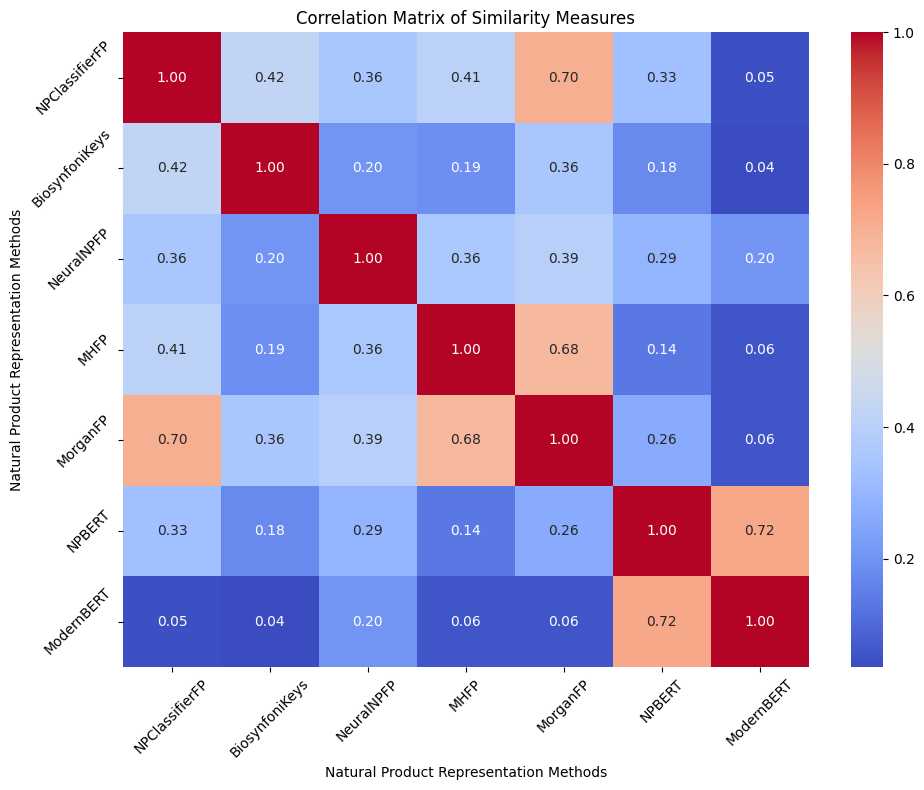

In [15]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
import numpy as np

labels={
                0: "NPClassifierFP",
                1: "BiosynfoniKeys",
                2: "NeuralNPFP",
                3: "MHFP", 
                4: "MorganFP",
                5: "NPBERT",
                6: "ModernBERT"
        } 

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Similarity Measures')
plt.xlabel('Natural Product Representation Methods')
plt.ylabel('Natural Product Representation Methods')
plt.xticks(ticks=np.arange(7) + 0.5, labels=labels.values(), rotation=45)
plt.yticks(ticks=np.arange(7) + 0.5, labels=labels.values(), rotation=45)
plt.tight_layout()
plt.show()